In [ ]:
import pandas as pd
import seaborn as sns

In [3]:
gtf_file_path = "/links/groups/treutlein/USERS/jjans/resources/genomes/hsapiens/Homo_sapiens.GRCh38.111.chr.gtf"

def get_ens_dict(file_path):
    with open(file_path) as f:
        gtf = list(f)

    gtf = [x for x in gtf if not x.startswith('#')]
    gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]
    if len(gtf) == 0:
        print('you need to change gene_id " and gene_name " formats')
    
    gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
    gtf = dict(set(gtf))
    return gtf

gtf_dict = get_ens_dict(gtf_file_path) #replace with your file path

In [4]:
import os

In [5]:
i = 0
for gaba_pre_sample in os.listdir("iGABA_pre"):
    df = pd.read_csv("iGABA_pre/"+gaba_pre_sample+"/10.MAPPING/"+gaba_pre_sample+"_STAR_ReadsPerGene.out.tab",sep="\t",skiprows=4,header=None)


    #parse data
    df.columns = ['Gene_ID','Unstranded','1st_read','2nd_read']
    result_list = [gtf_dict[x] if x in gtf_dict else x for x in df['Gene_ID']]
    df['Gene_Symbol'] = result_list
    df.index = df['Gene_Symbol']

    if i == 0:
        df_all = pd.DataFrame(index=df.index,columns=os.listdir("iGABA_pre"))
        i+=1

    df[gaba_pre_sample] = df['Unstranded']
    df_all[gaba_pre_sample] = df[gaba_pre_sample]
    


In [ ]:
df_all = df_all.groupby('Gene_Symbol').sum()
df_all.to_csv("bulk/iGABA_pre_merged_symbols.tsv",sep="\t")

In [6]:
df_all.sum().sort_values()

iGABA_pre_24     421492
iGABA_pre_23     920916
iGABA_pre_74    1045205
iGABA_pre_66    1048094
iGABA_pre_30    1122436
                 ...   
iGABA_pre_50    3640130
iGABA_pre_54    3705051
iGABA_pre_55    3778982
iGABA_pre_18    3792242
iGABA_pre_7     4434973
Length: 96, dtype: int64

In [7]:
df_all_CPM = df_all/df_all.sum()*1e6

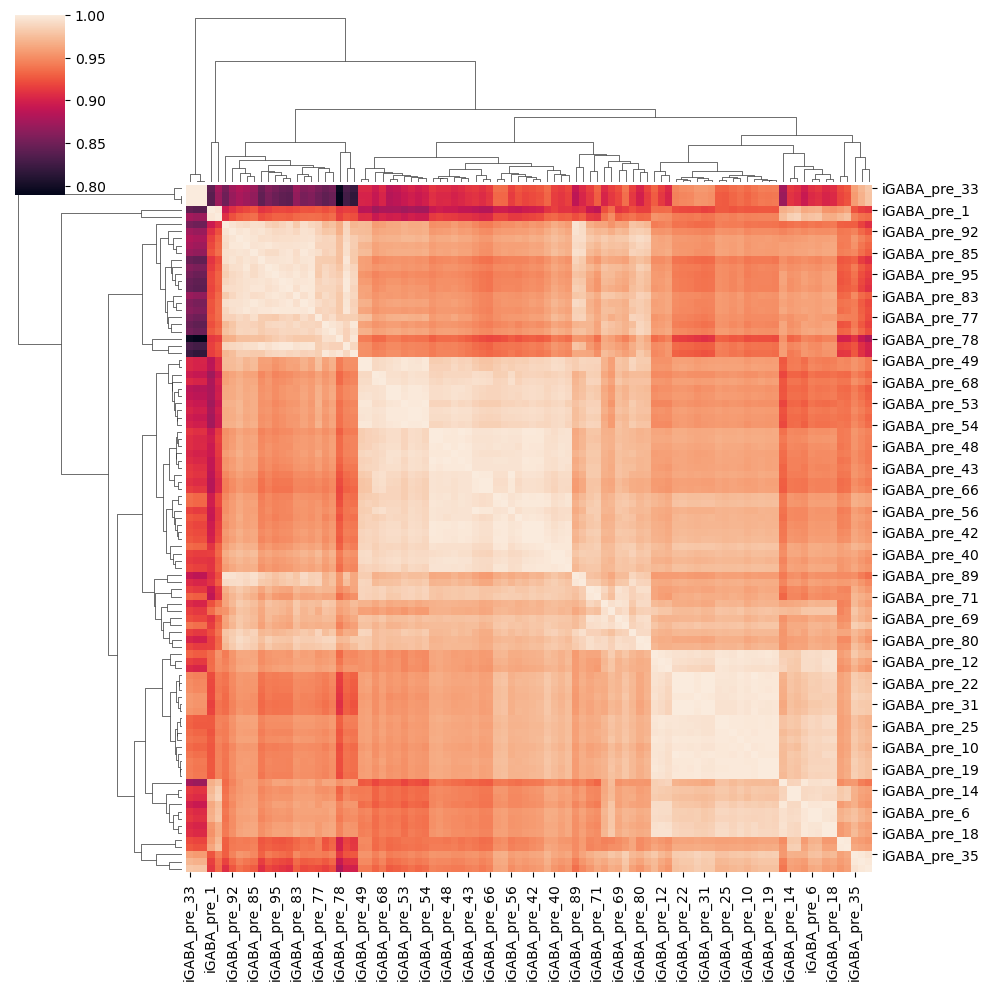

In [ ]:
var_genes = df_all_CPM.T.var().sort_values(ascending=False).head(n=1000).index
sns.clustermap(df_all_CPM.loc[var_genes].corr())

In [ ]:
df_all_glut = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/prepatterning_multiome/bulk/expression_data_names.tsv",sep="\t",index_col=0)

df_all_glut.columns = ['iGlut_pre_'+str(x) for x in df_all_glut.columns]
df_all_glut.to_csv("bulk/iGlut_pre_merged_symbols.tsv",sep='\t')
df_all_glut_CPM = df_all_glut/df_all_glut.sum()*1e6


In [14]:
common_genes = list(set(df_all_CPM.index)&set(df_all_glut_CPM.index))

df_all_CPM_use = df_all_CPM.loc[common_genes].copy()
df_all_glut_CPM_use = df_all_glut_CPM.loc[common_genes].copy()

df_all_CPM_use = df_all_CPM_use.groupby('Gene_Symbol').sum()

In [ ]:
df_all_glut_CPM_use = df_all_glut_CPM_use[sorted(df_all_glut_CPM_use.columns)]
df_all_CPM_use = df_all_CPM_use[sorted(df_all_CPM_use.columns)]

In [ ]:
corr_plot = df_all_CPM_use.apply(lambda s: df_all_glut_CPM_use.corrwith(s))
corr_plot = corr_plot.drop('iGlut_pre_72')
corr_plot = corr_plot.drop('iGABA_pre_24',axis=1)

<Axes: >

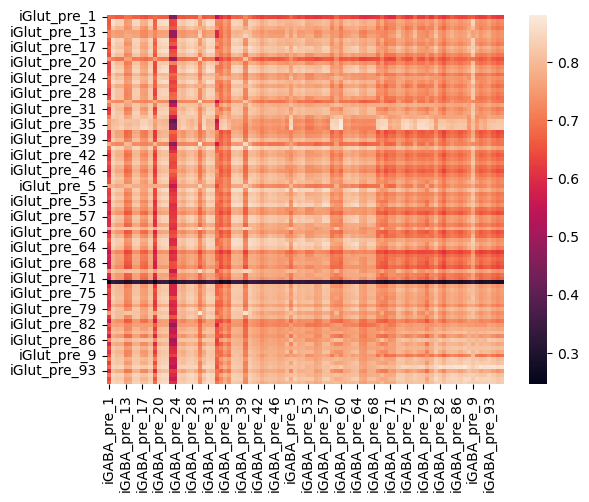

In [ ]:
sns.heatmap(corr_plot)